# Ejercicio de Clasificación de Hojas
---
**Montar la carpeta de Google Drive y definir constantes para trabajar**

In [1]:
ColabNotebook = 'google.colab' in str(get_ipython())

if ColabNotebook:
    # monta G-drive en entorno COLAB
    from google.colab import drive
    drive.mount('/content/drive/')

    # carpeta donde se encuentran archivos .py auxiliares
    FUENTES_DIR = '/content/drive/MyDrive/Colab Notebooks/FUENTES/'
    DATOS_DIR = '/content/drive/MyDrive/Colab Notebooks/DATOS/'      # carpeta donde se encuentran los datasets
else:
    # configuración para notebook con instalación LOCAL
    FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
    DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


---
El archivo ZOO.csv contiene información de 101 animales caracterizados por los siguientes atributos

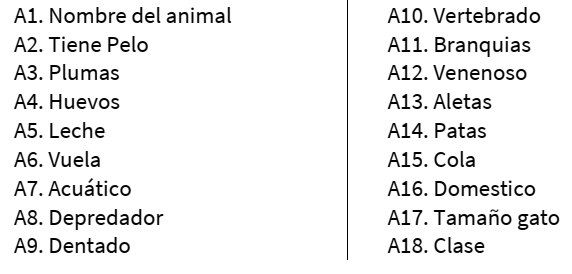

Salvo los atributos A1 y A18 que contienen texto y el A14 que contiene el número de patas del animal, el resto toma el valor 1 si el animal posee la característica y 0 si no. Hay 7 valores de clase posible (atributo A18): mamífero, ave, pez, invertebrado, insecto, reptil y anfibio.

In [2]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

# importa perceptron de Laura en la carpeta Colab definida con FUENTES_DIR
from ClassPerceptron import Perceptron

nombre_archivo = DATOS_DIR + 'zoo.csv' # archivo de hojas

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])

# recupera todas las columnas salvo primera (animal) y última (clase)
X = np.array( df.iloc[:,1:-1] )
T_raw = np.array( df.iloc[:,-1])

# visualiza
display(df)

# imprime las clases
print("Especies:\n",df['Clase'].unique())

,animal,Tiene_Pelo,Tiene_Plumas,Nace_de_huevo,Toma_Leche,Vuela,Acuatico,Depredador,Dentado,Vertebrado,Respira,Venenoso,Tiene_Aletas,Cant_Patas,Tiene_Cola,Domestico,Tamano_Gato,Clase
0,oso_hormiguero,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
1,antilope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,Mamifero
2,robalo,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,Pez
3,oso,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,Mamifero
4,jabali,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,canguro,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,Mamifero
97,avispa,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,Insecto
98,lobo,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,Mamifero
99,gusano,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Invertebrado


Especies:
 ['Mamifero' 'Pez' 'Ave' 'Invertebrado' 'Insecto' 'Anfibio' 'Reptil']


---
### Reconocer una Clase vs. Resto
b)	Utilice todos los ejemplos para entrenar un perceptrón que sea capaz de reconocer si un animal es un mamífero. Entrene varias veces si es necesario y verifique que funcione correctamente.

In [3]:
CLASE = "Mamifero"
#CLASE = "Ave"

MAX_ITE = 200
ALFA = 0.01

# establece 1 para la clase seleccionada y 0 para otra
T = 1*(T_raw==CLASE)

# crea perceptrón con parámetros indicados
modelo = Perceptron(alpha=ALFA, n_iter=MAX_ITE, draw=False)

modelo.fit(X, T)      # entrena

Y = modelo.predict(X) # Prediccion

# Resultados - Accuracy
efectividad = 100.0*np.sum(Y==T)/len(Y)

iter = len(modelo.errors_)

print("\nClase %s con %6.2f%% de efectividad en %d iteraciones" % (CLASE, efectividad, iter))


Clase Mamifero con 100.00% de efectividad en 6 iteraciones


---
### Características Relevantes
Observe los pesos del perceptrón entrenado ¿Puede determinar cuáles son las características más relevantes para decidir si se trata de un mamífero o no? Realice varias ejecuciones independientes y observe si las características más relevantes siguen siendo las mismas.

In [4]:
#CLASE = "Mamifero"
#CLASE = "Ave"
CLASE = "Mamifero"

MAX_ITE = 200
ALFA = 0.005

# establece 1 para la clase seleccionada y 0 para otra
T = 1*(T_raw==CLASE)

# crea perceptrón con parámetros indicados
modelo = Perceptron(alpha=ALFA, n_iter=MAX_ITE, draw=False)

modelo.fit(X, T)      # entrena

Y = modelo.predict(X) # Prediccion

# Resultados - Accuracy
efectividad = 100.0*np.sum(Y==T)/len(Y)

iter = len(modelo.errors_)

print("\nClase %s con %6.2f%% de efectividad en %d iteraciones" % (CLASE, efectividad, iter))


# obtiene los índices de W, ordenados por su contenido de menor a mayor
W = modelo.w_
idx=np.argsort(np.abs(W))

# invierte el indice: de mayor a menor
idx =idx[::-1]

#ordena los atributos. De la columna 1 a la anteúltima reordena según
atributos_ordenados =  df.columns[1:-1][idx]
pesos_ordenados = W[idx]

resultado = np.array([atributos_ordenados, pesos_ordenados]).transpose()

print(resultado)
print(modelo.b_)


Clase Mamifero con 100.00% de efectividad en 16 iteraciones
[['Tiene_Pelo' 0.6242822477953529]
 ['Tiene_Plumas' -0.45911251456535984]
 ['Dentado' 0.33292623199699434]
 ['Domestico' -0.3038214401685896]
 ['Tiene_Aletas' 0.29652987964446453]
 ['Respira' -0.22312369278790978]
 ['Nace_de_huevo' -0.15130911416843915]
 ['Acuatico' -0.13648500194571536]
 ['Toma_Leche' 0.11228008540702503]
 ['Tamano_Gato' 0.06875177483595937]
 ['Vertebrado' 0.05210937103180734]
 ['Tiene_Cola' -0.05147905681695277]
 ['Vuela' -0.04963827798753028]
 ['Venenoso' -0.049182985449890644]
 ['Cant_Patas' 0.029488393335336992]
 ['Depredador' -0.009174253456703588]]
-0.4021446343380357


---
# Experimentando...

Investigar cuantos atributos son necesarios para identificar la especie

Atributos seleccionados para Mamifero:
 [['Toma_Leche' 0.4047195196908921 '+']
 ['Nace_de_huevo' 0.3518257264466093 '-']
 ['Tiene_Pelo' 0.3086141234743992 '-']
 ['Tiene_Plumas' 0.22669318410304043 '-']]


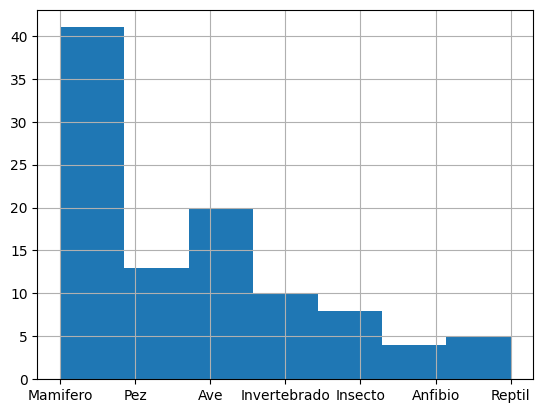

In [5]:
# Clases en el dataset
CLASES = ["Mamifero", "Pez", "Ave", "Invertebrado", "Insecto", "Anfibio", "Reptil"]

# Seleccion de clase a clasificar: una contra el resto, Mamifero = 0
CLASE_ID = 0

# Nombre de la clase seleccionada
CLASE = CLASES[CLASE_ID]

#cantidad de atributos mas importantes a tomar
CAN_ATRIB = 4
MAX_ITE = 200
ALFA = 0.02

REPETICIONES = 150

df['Clase'].hist(bins=len(CLASES))

Xn = np.array( df.iloc[:,1:-1] )
T_raw = np.array( df.iloc[:,-1])

# establece 1 para la clase seleccionada y 0 para otra
T = 1*(T_raw==CLASE)

# para acumular pesos
W_acc = np.zeros(Xn.shape[1])
for i in range(0,REPETICIONES):
    # entrena al perceptron
    # crea perceptrón con parámetros indicados
    modelo = Perceptron(alpha=ALFA, n_iter=MAX_ITE, draw=False)

    modelo.fit(Xn, T)      # entrena

    # acumula los pesos. pesos positivos => mas positivos, pesos negativos => menos negativos
    W_acc+= np.abs(modelo.w_)
    #W_acc+= modelo.w_

# Para reflexionar:
# cada atributo de una muestra puede valer 1 o 0, es decir está presente o no está presente
# Para el perceptron, valores de peso mayores a 0 indican que el atributo asociado a dicho peso es relevante

# Promedia pesos
W_acc = W_acc/ REPETICIONES

# obtiene los índices de W, ordenados por su contenido de menor a mayor
idx=np.argsort(np.abs(W_acc))
# invierte el indice: de mayor a menor
idx = idx[::-1]

# selecciona los 3 de mayor peso promedio
idx =idx[0:CAN_ATRIB]

# deja solo los indices de los pesos positivos con cierto margen
idx = idx[np.abs(W_acc[idx]) > 0.08]

#ordena los atributos. De la columna 1 a la anteúltima reordena según
atributos_ordenados =  df.columns[1:-1][idx]
pesos_ordenados = W_acc[idx]
pesos_ordenados_signo = np.where(modelo.w_[idx] >= 0, '+', '-')

# arma una estructura de atributos + pesos seleccionados, ordenados por valor accumulado descendiente
resultado = np.array([atributos_ordenados, pesos_ordenados, pesos_ordenados_signo]).transpose()

print("Atributos seleccionados para %s:\n" % CLASE, resultado)




### Entrenamiento con Atributos Relevantes
Entrenamiento con los atributos mas significativos para la clase seleccionada

In [6]:
df_red = df.loc[:,atributos_ordenados]

Xn = np.array( df_red )
T_raw = np.array( df.iloc[:,-1])

# establece 1 para la clase seleccionada y 0 para otra
T = 1*(T_raw==CLASE)

# Entrena el perceptrón con los atributos
modelo = Perceptron(alpha=ALFA, n_iter=MAX_ITE, draw=False)
modelo.fit(Xn, T)      # entrena

iter = len(modelo.errors_)  # iteraciones
Y = modelo.predict(Xn)       # Prediccion

# calcular efectividad comparando T con Y
efectividad = 100*np.sum(T==Y) / len(Y)
print("\nEl perceptrón clasifica como ""%s"" con %6.2f%% de efectividad en %d iteraciones usando %d atributos" % (CLASE, efectividad, iter, len(atributos_ordenados)))


El perceptrón clasifica como Mamifero con 100.00% de efectividad en 5 iteraciones usando 4 atributos
